# Lead Score - Case Study


## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [6]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1 - Importing and cleaning the dataframe

### 1. Importing the dataframe

Let us start by importing and inspecting the dataframe

In [10]:
# Read data from the csv file
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 100)
lead_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Inspecting the dataframe

In [12]:
# Inspecting the shape of the dataframe
lead_df.shape

(9240, 37)

In [13]:
# The .info() code gives almost the entire information that needs to be inspected, 
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
#Using .describe() to get an idea of the numeric values
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 3. Data Cleaning

In [16]:
# To check for duplicates
lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We can see there are no duplicates in the dataset.Hoever,we will drop the Lead Number and Prospect ID columns since they are not important for the analysis

In [18]:
lead_df = lead_df.drop(['Lead Number','Prospect ID'],axis=1)

In [19]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead_df = lead_df.replace('Select', np.nan)

In [20]:
# Checking the percentage of missing values
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We can there are many columns having high null value percentage. Let us first drop the columns having greater than 35% of null values.

In [22]:
# Removing all the columns that are no required and have 35% null values
lead_cl_df_drop = lead_df.loc[:, lead_df.isnull().mean() > 0.35]
lead_cl_df_drop_1 = list(lead_cl_df_drop.keys())
lead_df = lead_df.drop(lead_cl_df_drop_1, axis=1)



In [23]:
# Checking the shape of the dataframe after removing the columns
lead_df.shape

(9240, 25)

In [24]:
#Checking if there are columns with one unique value since it won't affect our analysis
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [25]:

# Dropping unique valued columns
lead_df= lead_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [26]:
# Checking the shape of the dataframe after removing the columns
lead_df.shape

(9240, 20)

In [27]:
#Checking the percentage of null values 
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

Next, we will check the value counts of the variables that need to be imputed.

In [29]:
lead_df['Lead Source'].value_counts(normalize=True).head()

Lead Source
Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: proportion, dtype: float64

In [30]:
lead_df['TotalVisits'].value_counts(normalize=True).head()

TotalVisits
0.0    0.240470
2.0    0.184555
3.0    0.143469
4.0    0.123036
5.0    0.086016
Name: proportion, dtype: float64

In [31]:
lead_df['Page Views Per Visit'].value_counts(normalize=True).head()

Page Views Per Visit
0.0    0.240470
2.0    0.197188
3.0    0.131385
4.0    0.098429
1.0    0.071515
Name: proportion, dtype: float64

In [32]:
lead_df['Last Activity'].value_counts(normalize=True).head()

Last Activity
Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Name: proportion, dtype: float64

In [33]:
lead_df['Country'].value_counts(normalize=True).head()

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
Name: proportion, dtype: float64

In [34]:
lead_df['What is your current occupation'].value_counts(normalize=True).head()

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Name: proportion, dtype: float64

In [35]:
lead_df['What matters most to you in choosing a course'].value_counts(normalize=True).head()

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [36]:
# Now imputing the missing values as per their respective values.For the columns with around 29% missing value we will impute with 'Unknown' 
# and for columns with around 1-2% missing value we will impute with mode/most frequent values.


missing_val = { 'Lead Source':'Google',
                'TotalVisits':'0.0',
                'Page Views Per Visit':'0.0',
                'Last Activity':'Email Opened',
                'Country':'Unknown',
                 'What is your current occupation':'Unknown', 
                'What matters most to you in choosing a course':'Unknown'}

lead_df = lead_df.fillna(value = missing_val)


In [37]:
#checking for null percentage after the imputation to verify no missing data is present in dataframe
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

## Step 2 -  EDA

In [39]:

# Defining function for percentage plots
def percent_plot(var):
    values = (lead_df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

In [40]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   Country                                        9240 non-null   

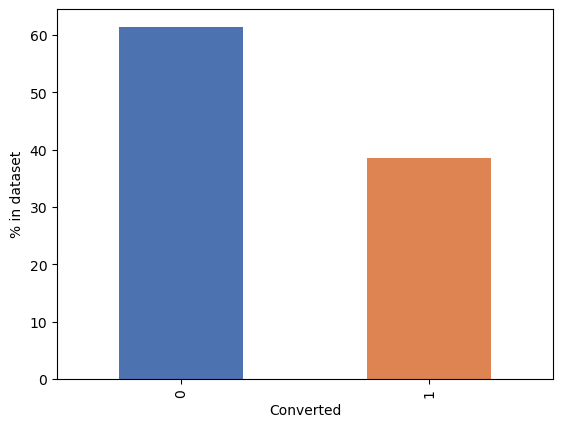

In [41]:
# For the target variable 'Converted'
percent_plot('Converted')

From the above percent plot, we can see that almost 60% of the leads are not converted and around 38% of the leads get converted.

### 2.1 Visualising Numerical Variables and Outlier Treatment

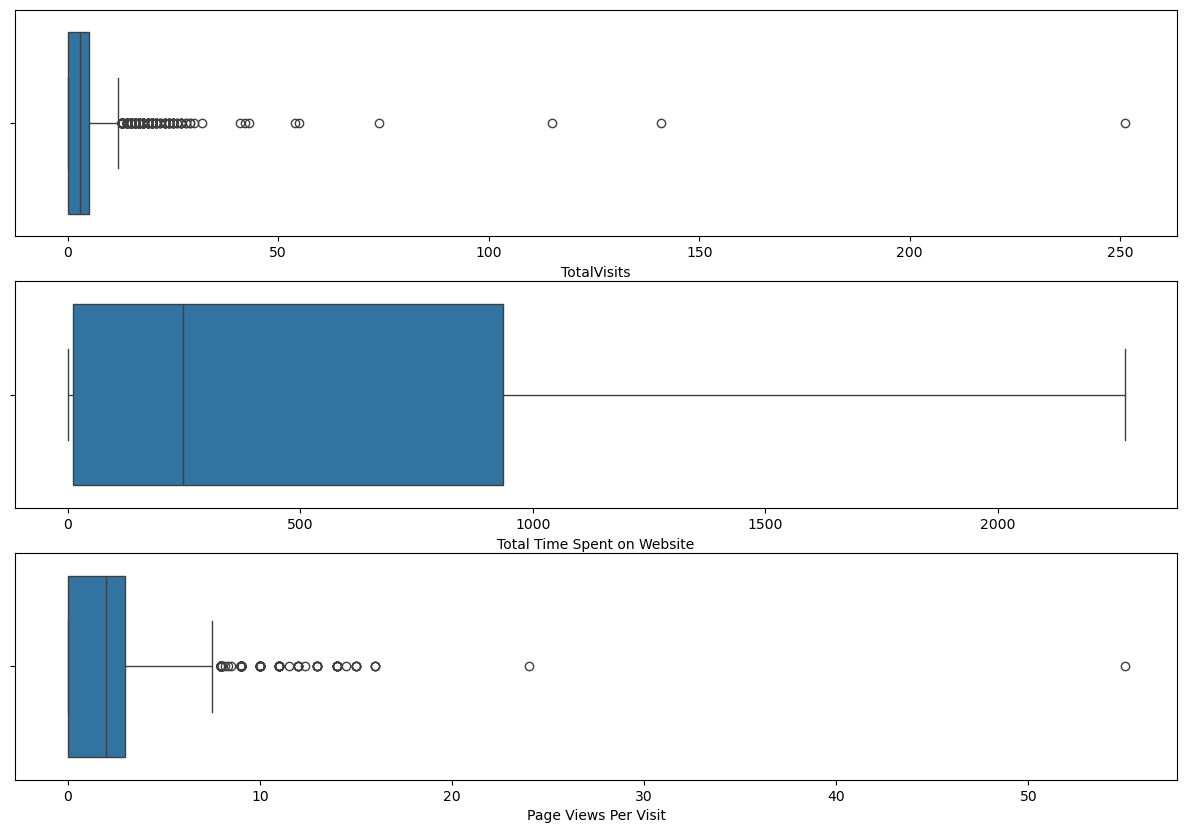

In [44]:
# Let us look at the boxplots of the numerical variables to check for any outliers.
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
plt.show()

In [45]:
#Let us also look the percentile distribution of the numerical variables
lead_df[num_var].describe([0.05,.25, .5, .75, .90, .95])

,Total Time Spent on Website
count,9240.000000
mean,487.698268
std,548.021466
min,0.000000
5%,0.000000
25%,12.000000
50%,248.000000
75%,936.000000
90%,1380.000000
95%,1562.000000


From the boxplots, we can see that there are outliers present in the variables.

For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
There are no significant outliers in 'Total Time Spent on Website'
For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [47]:
# From the above two data we see that outlier treatment needs to be done for TotalVisits and Page Views Per Visit column
lead_df['TotalVisits'] = pd.to_numeric(lead_df['TotalVisits'], errors='coerce')
percentile = lead_df['TotalVisits'].quantile([0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentile[0]] = percentile[0]

lead_df['Page Views Per Visit'] = pd.to_numeric(lead_df['Page Views Per Visit'], errors='coerce')
percentile = lead_df['Page Views Per Visit'].quantile([0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

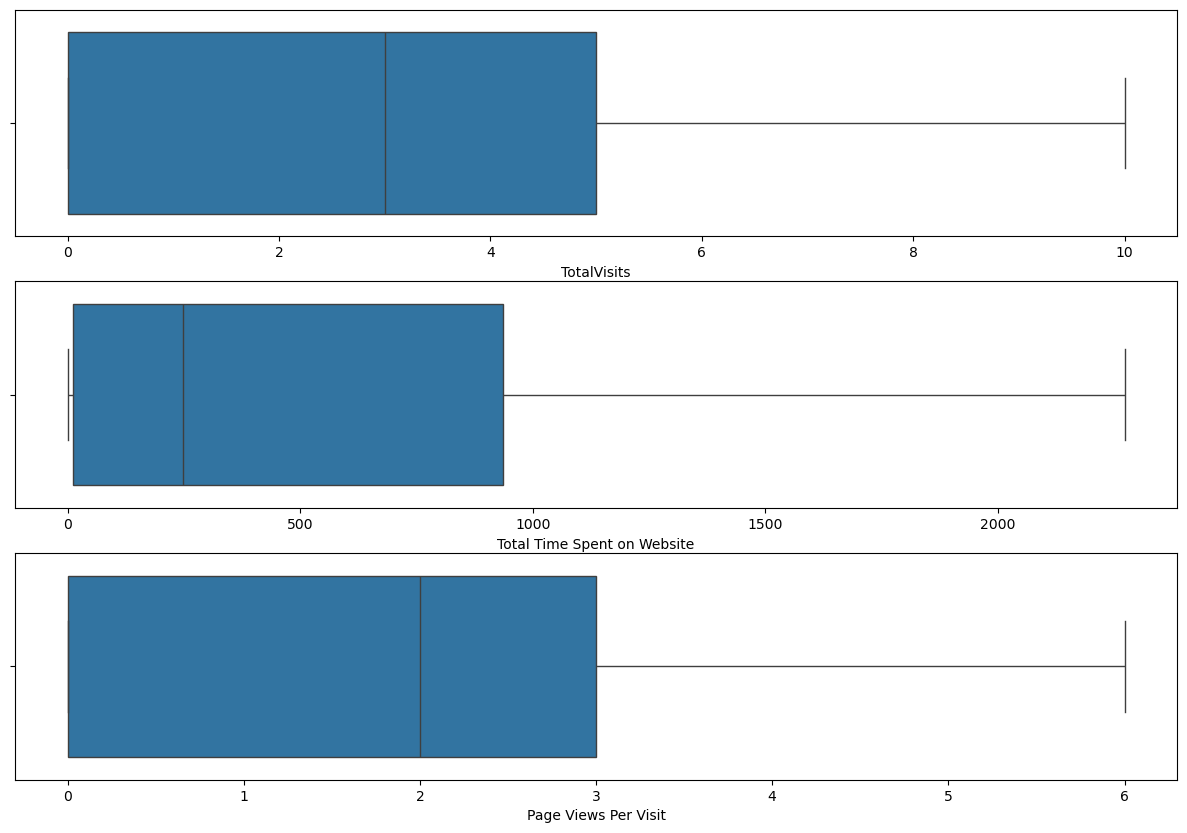

In [48]:

# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
plt.show()

Let us reverify the boxplots of the Total Visits and Page Views Per Visit columns after outlier treatment

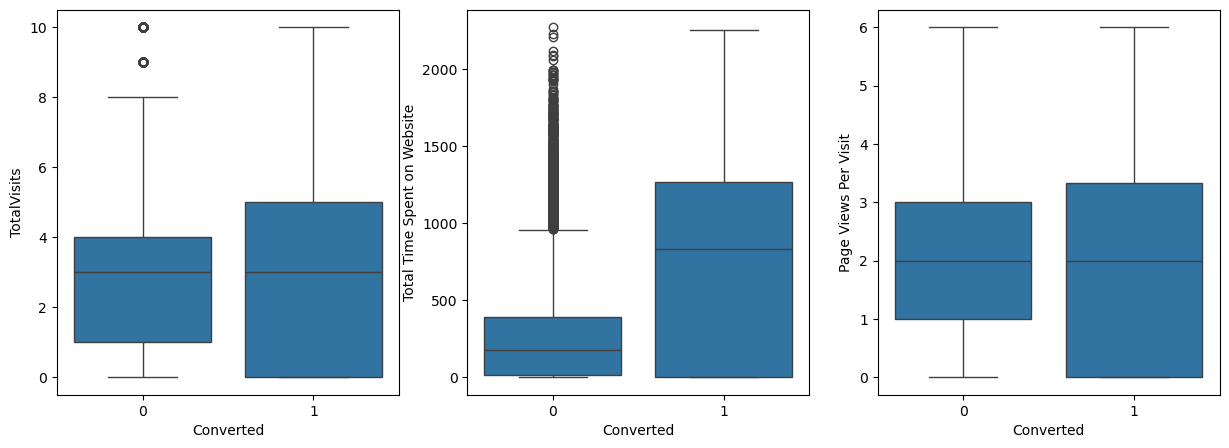

In [50]:

# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = lead_df)
plt.show()


'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.

People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.

'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

### 2.2 Visualising Categorical Variables

In [53]:
# Listing out the Categorical variables
cat_var = list(lead_df.columns[lead_df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [54]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = lead_df)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = lead_df)
        plt.xticks(rotation = 90)
    plt.show()
     

Let us check the count plot of the categorical variables one by one.

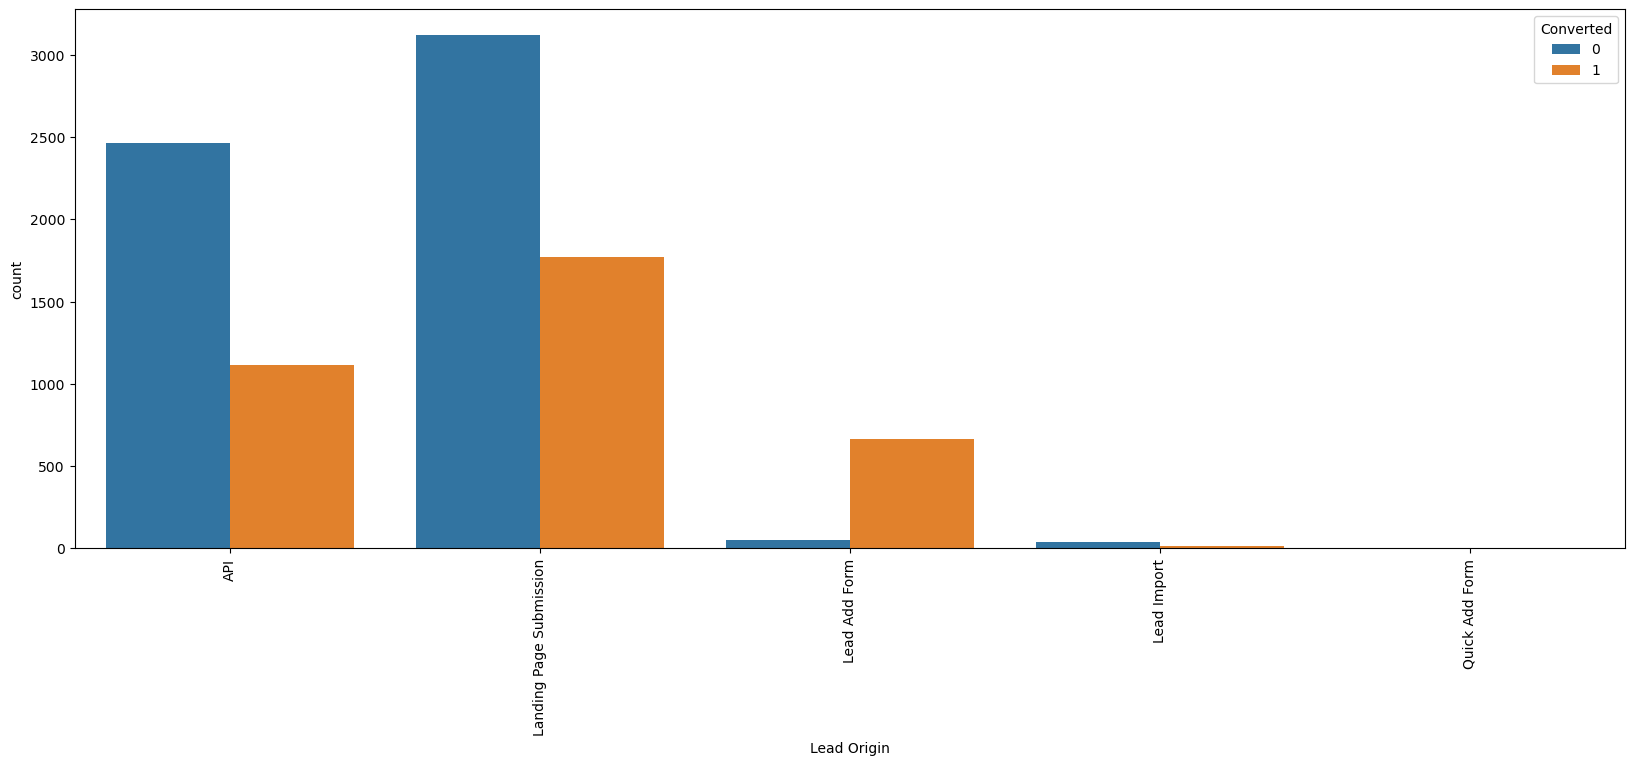

In [56]:

plot_cat_var(cat_var[0])

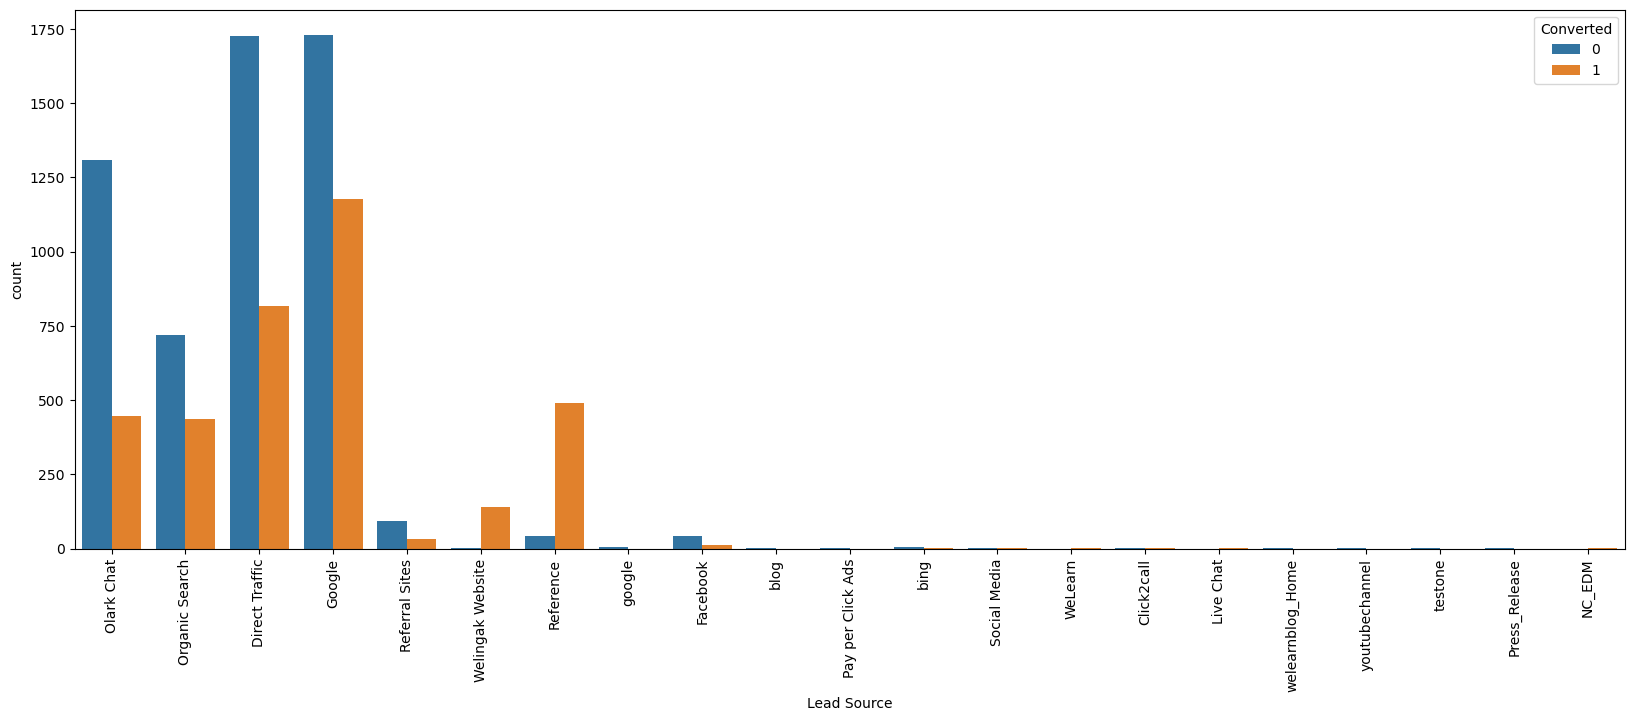

In [57]:
plot_cat_var(cat_var[1])

In [58]:
# To correct spelling error
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [59]:

categories = lead_df['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [60]:
# To reduce categories
lead_df['Lead Source'] = lead_df['Lead Source'].replace(categories[8:], 'Others')

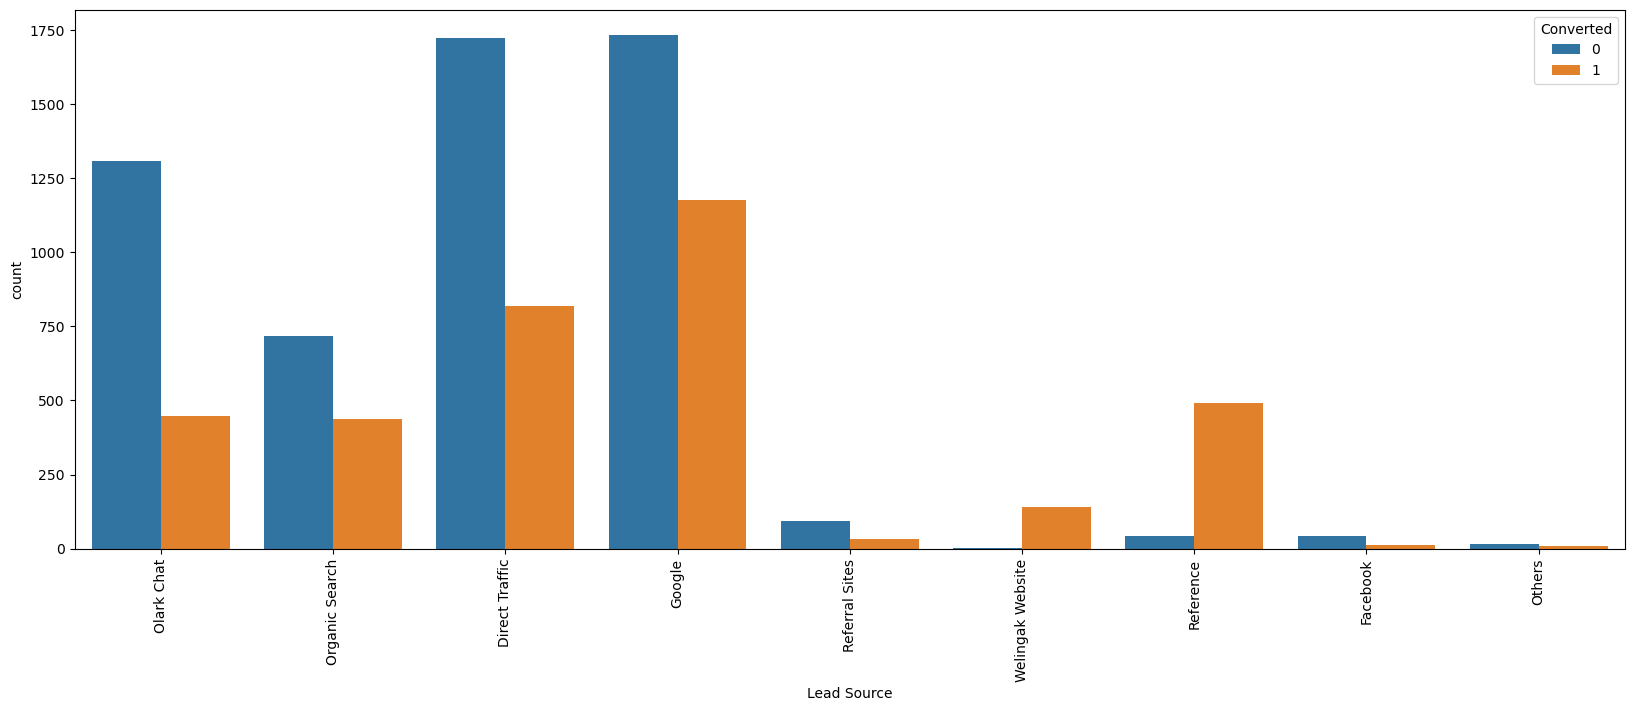

In [61]:
# To plot new categories
plot_cat_var(cat_var[1])

Spelling error: We've to change 'google' to 'Google'

As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
'
Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

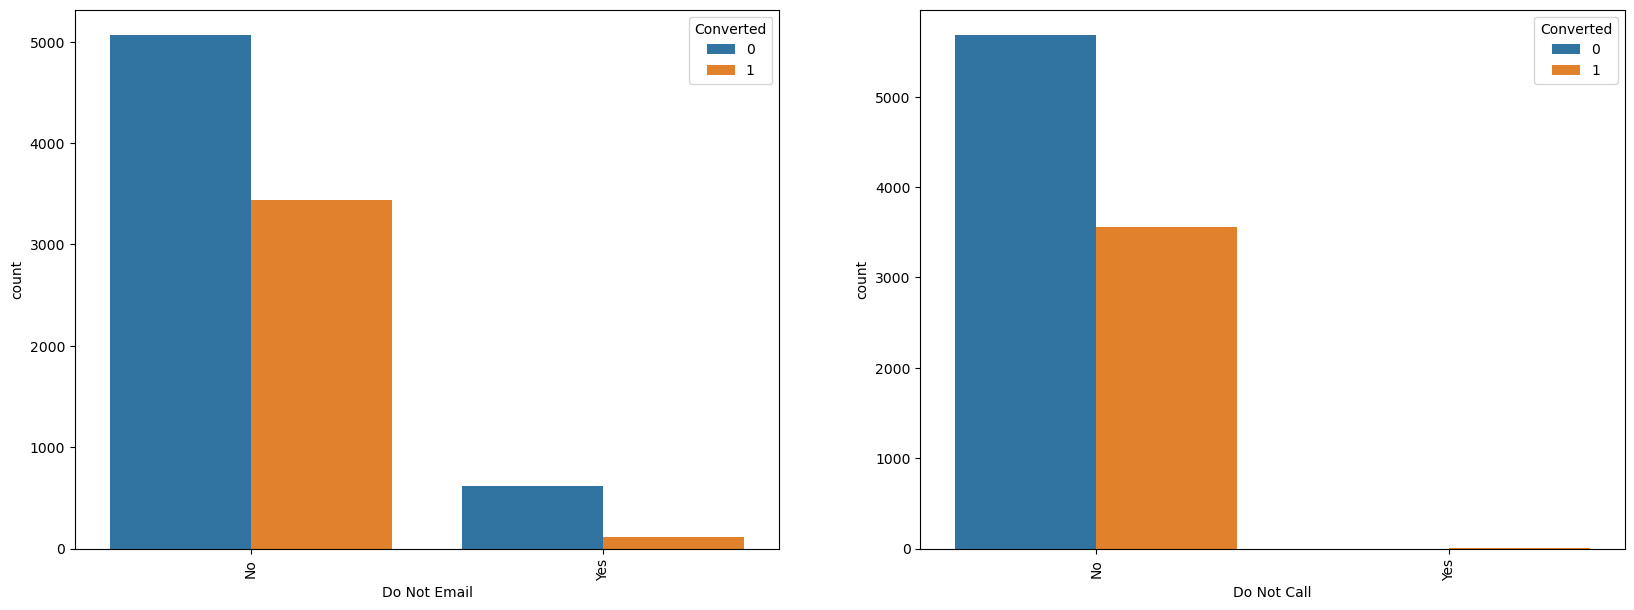

In [63]:

plot_cat_vars([cat_var[2],cat_var[3]])

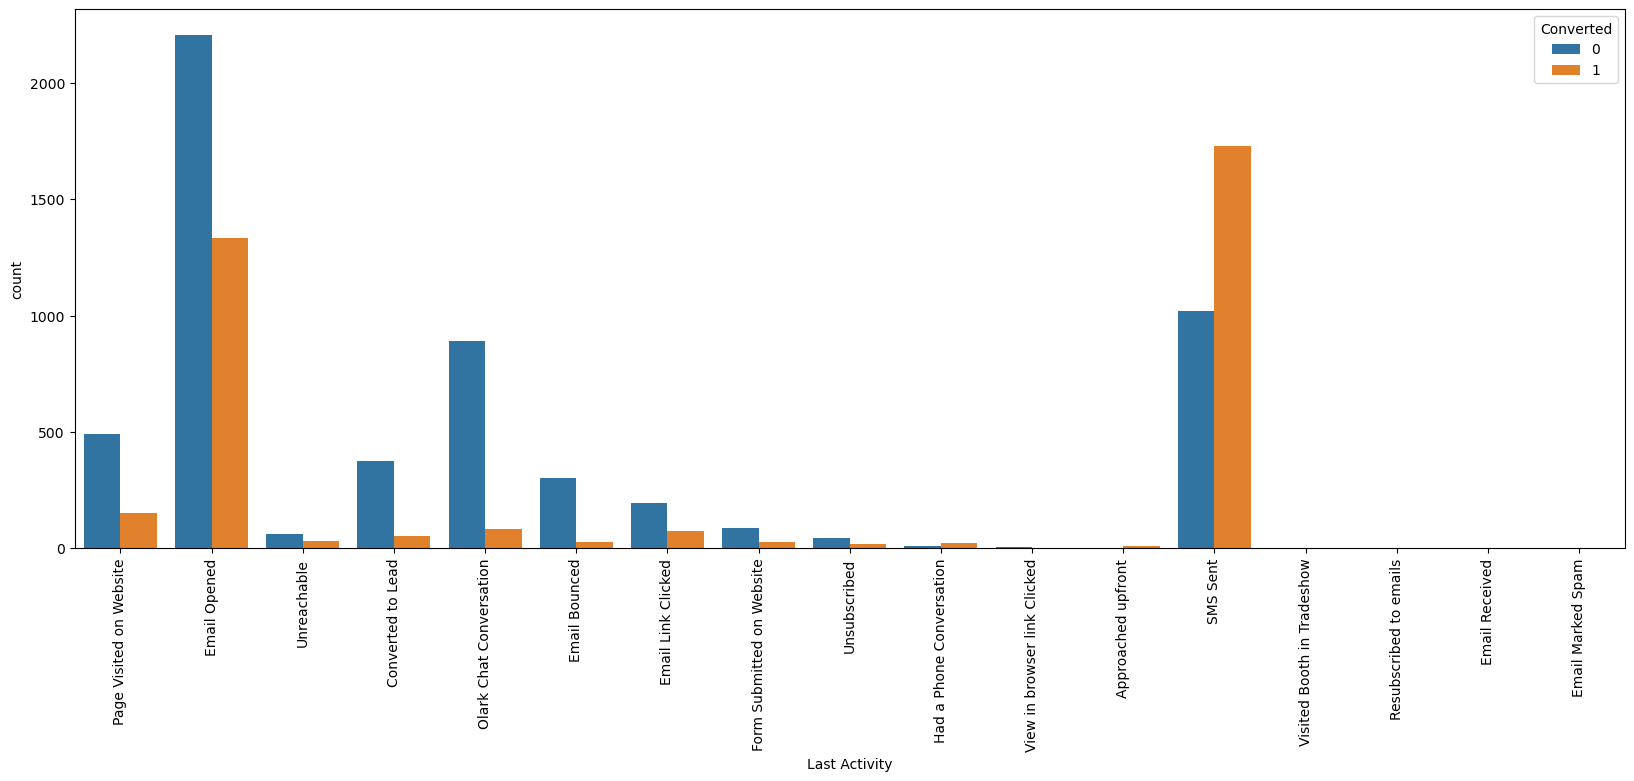

In [64]:
plot_cat_var(cat_var[4])

Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.

Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [66]:
categories = lead_df['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [67]:
# To reduce categories
lead_df['Last Activity'] = lead_df['Last Activity'].replace(categories[-5:], 'Others')

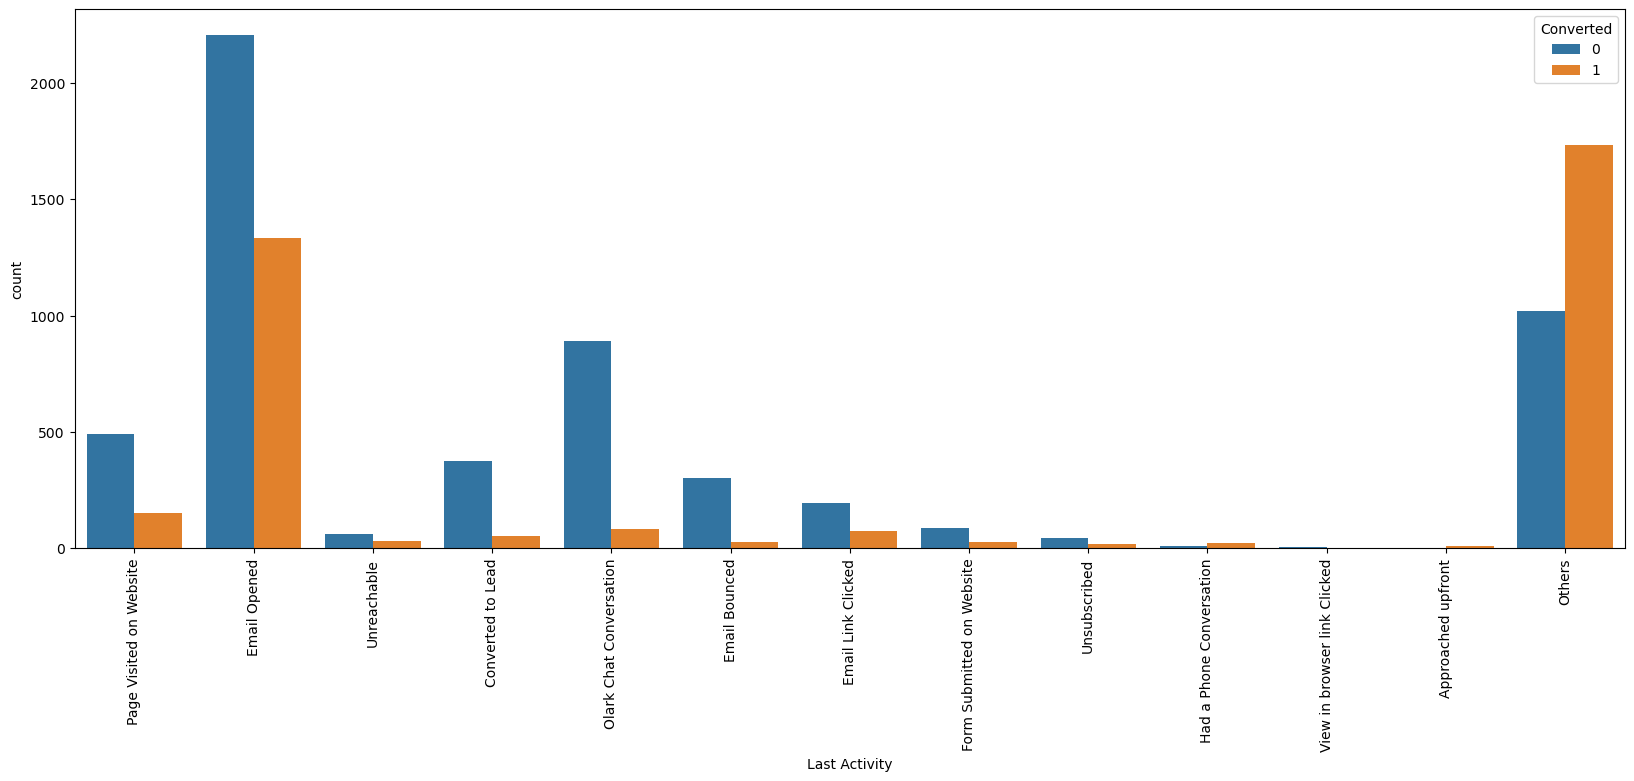

In [68]:
# To plot new categories
plot_cat_var(cat_var[4])

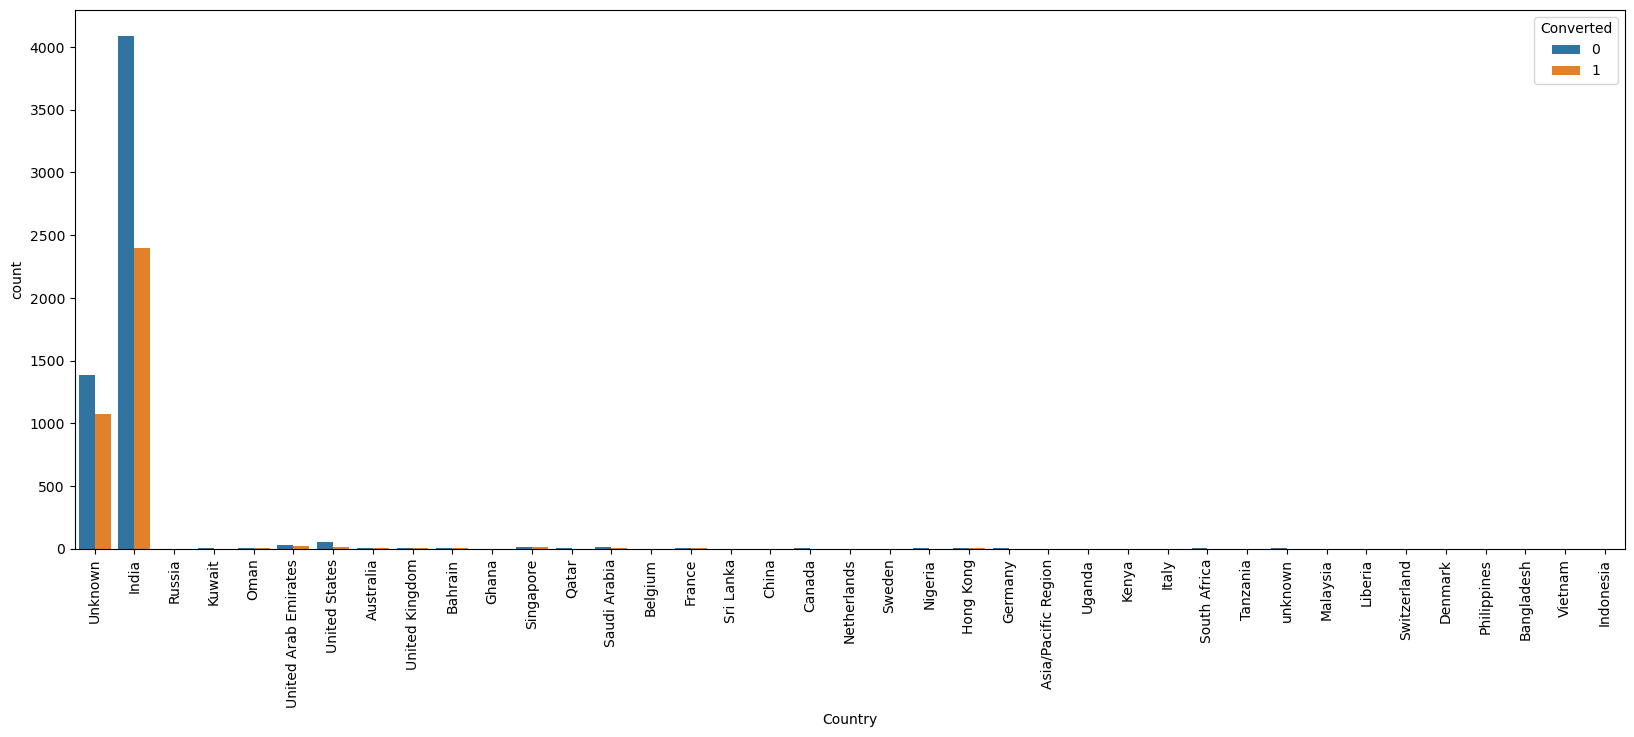

In [69]:

plot_cat_var(cat_var[5])

From the above graph we can see most conversions are for India

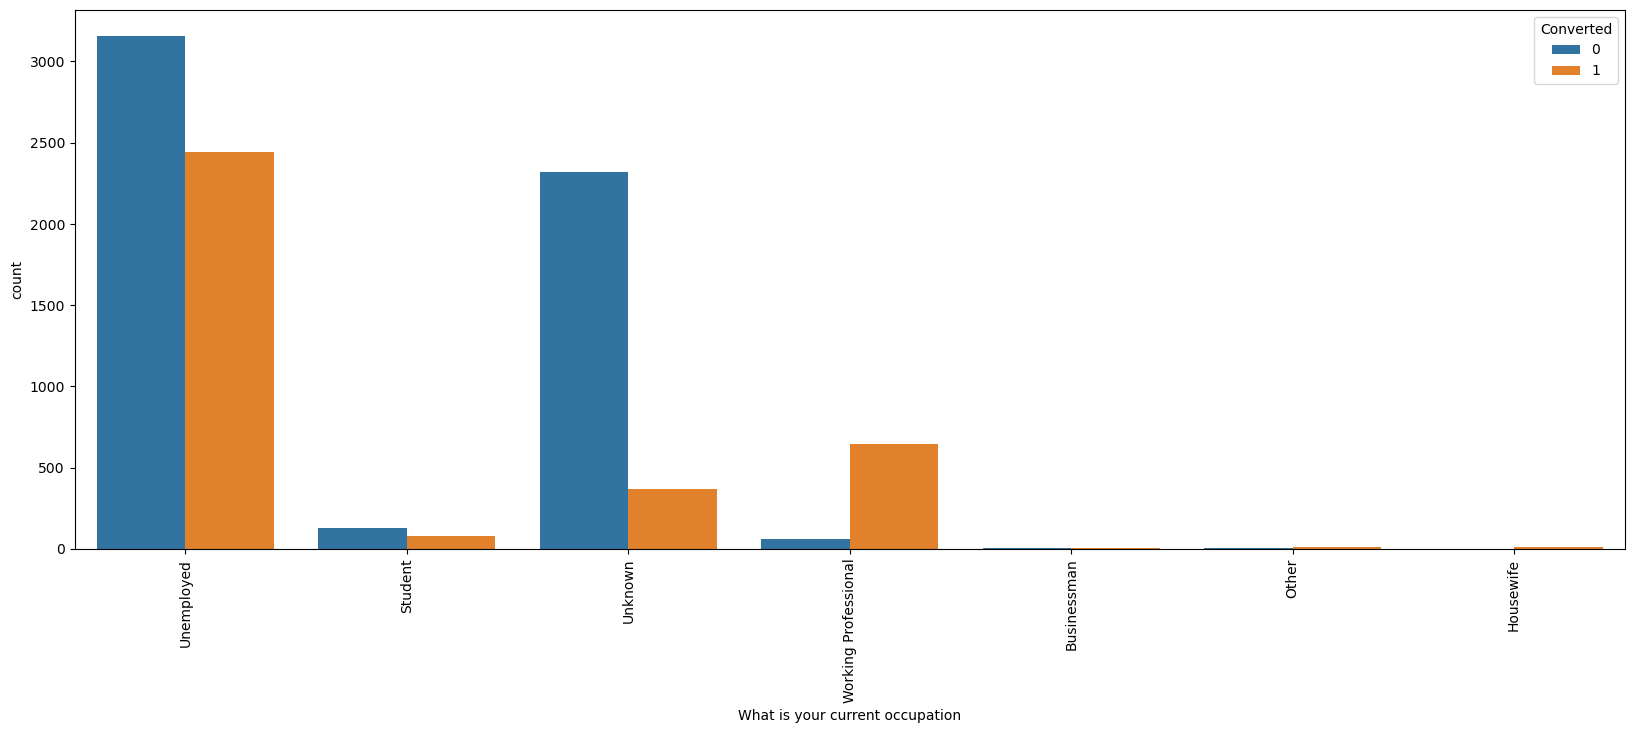

In [71]:
plot_cat_var(cat_var[6])

From the above graph we can see working professionals have the highest conversion rate

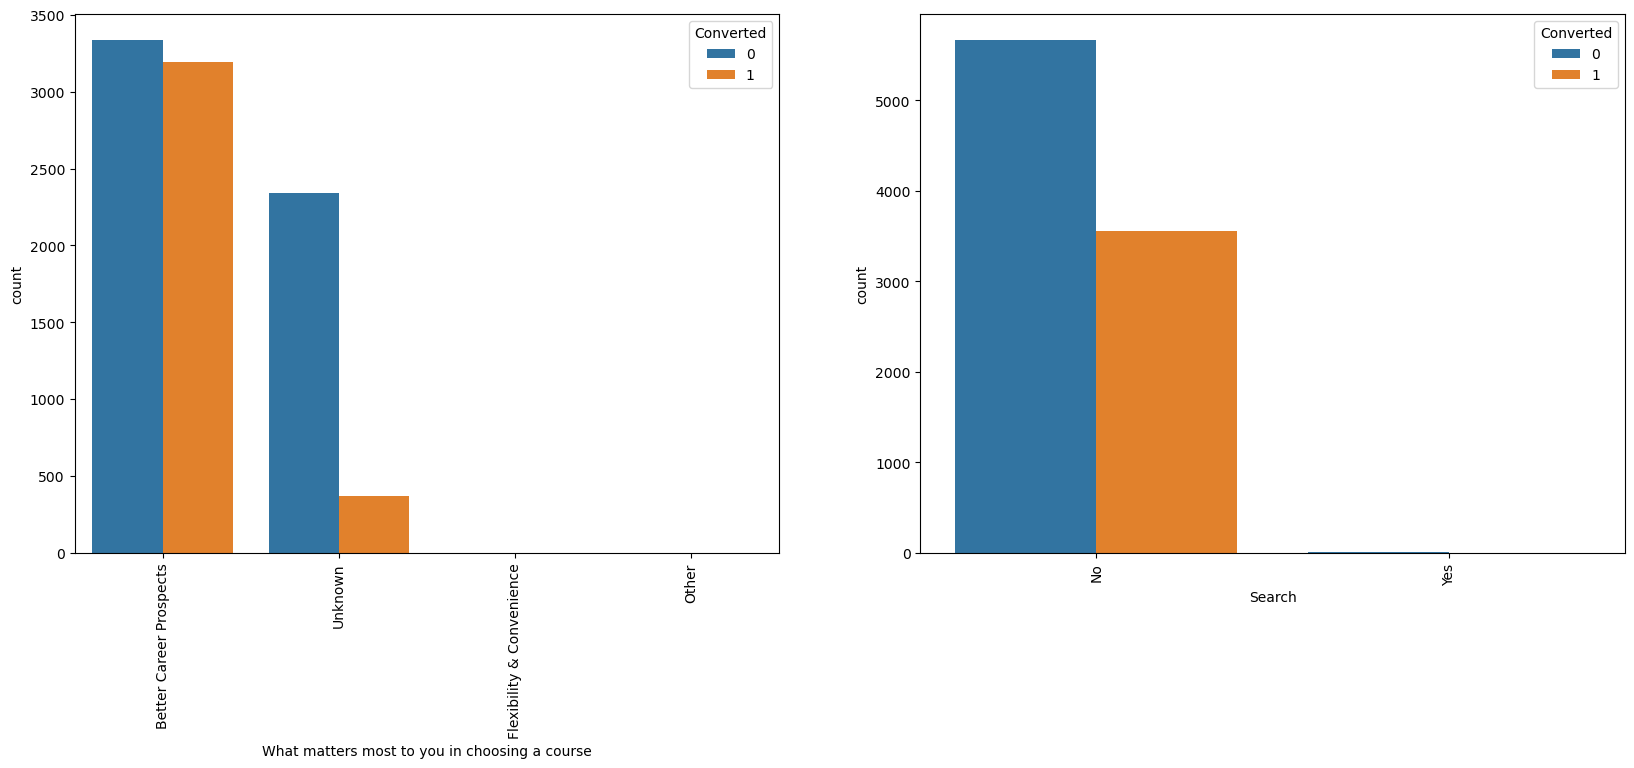

In [73]:

plot_cat_vars([cat_var[7],cat_var[8]])

Variable 'What matters most to you in choosing a course' has only one category with significant count.

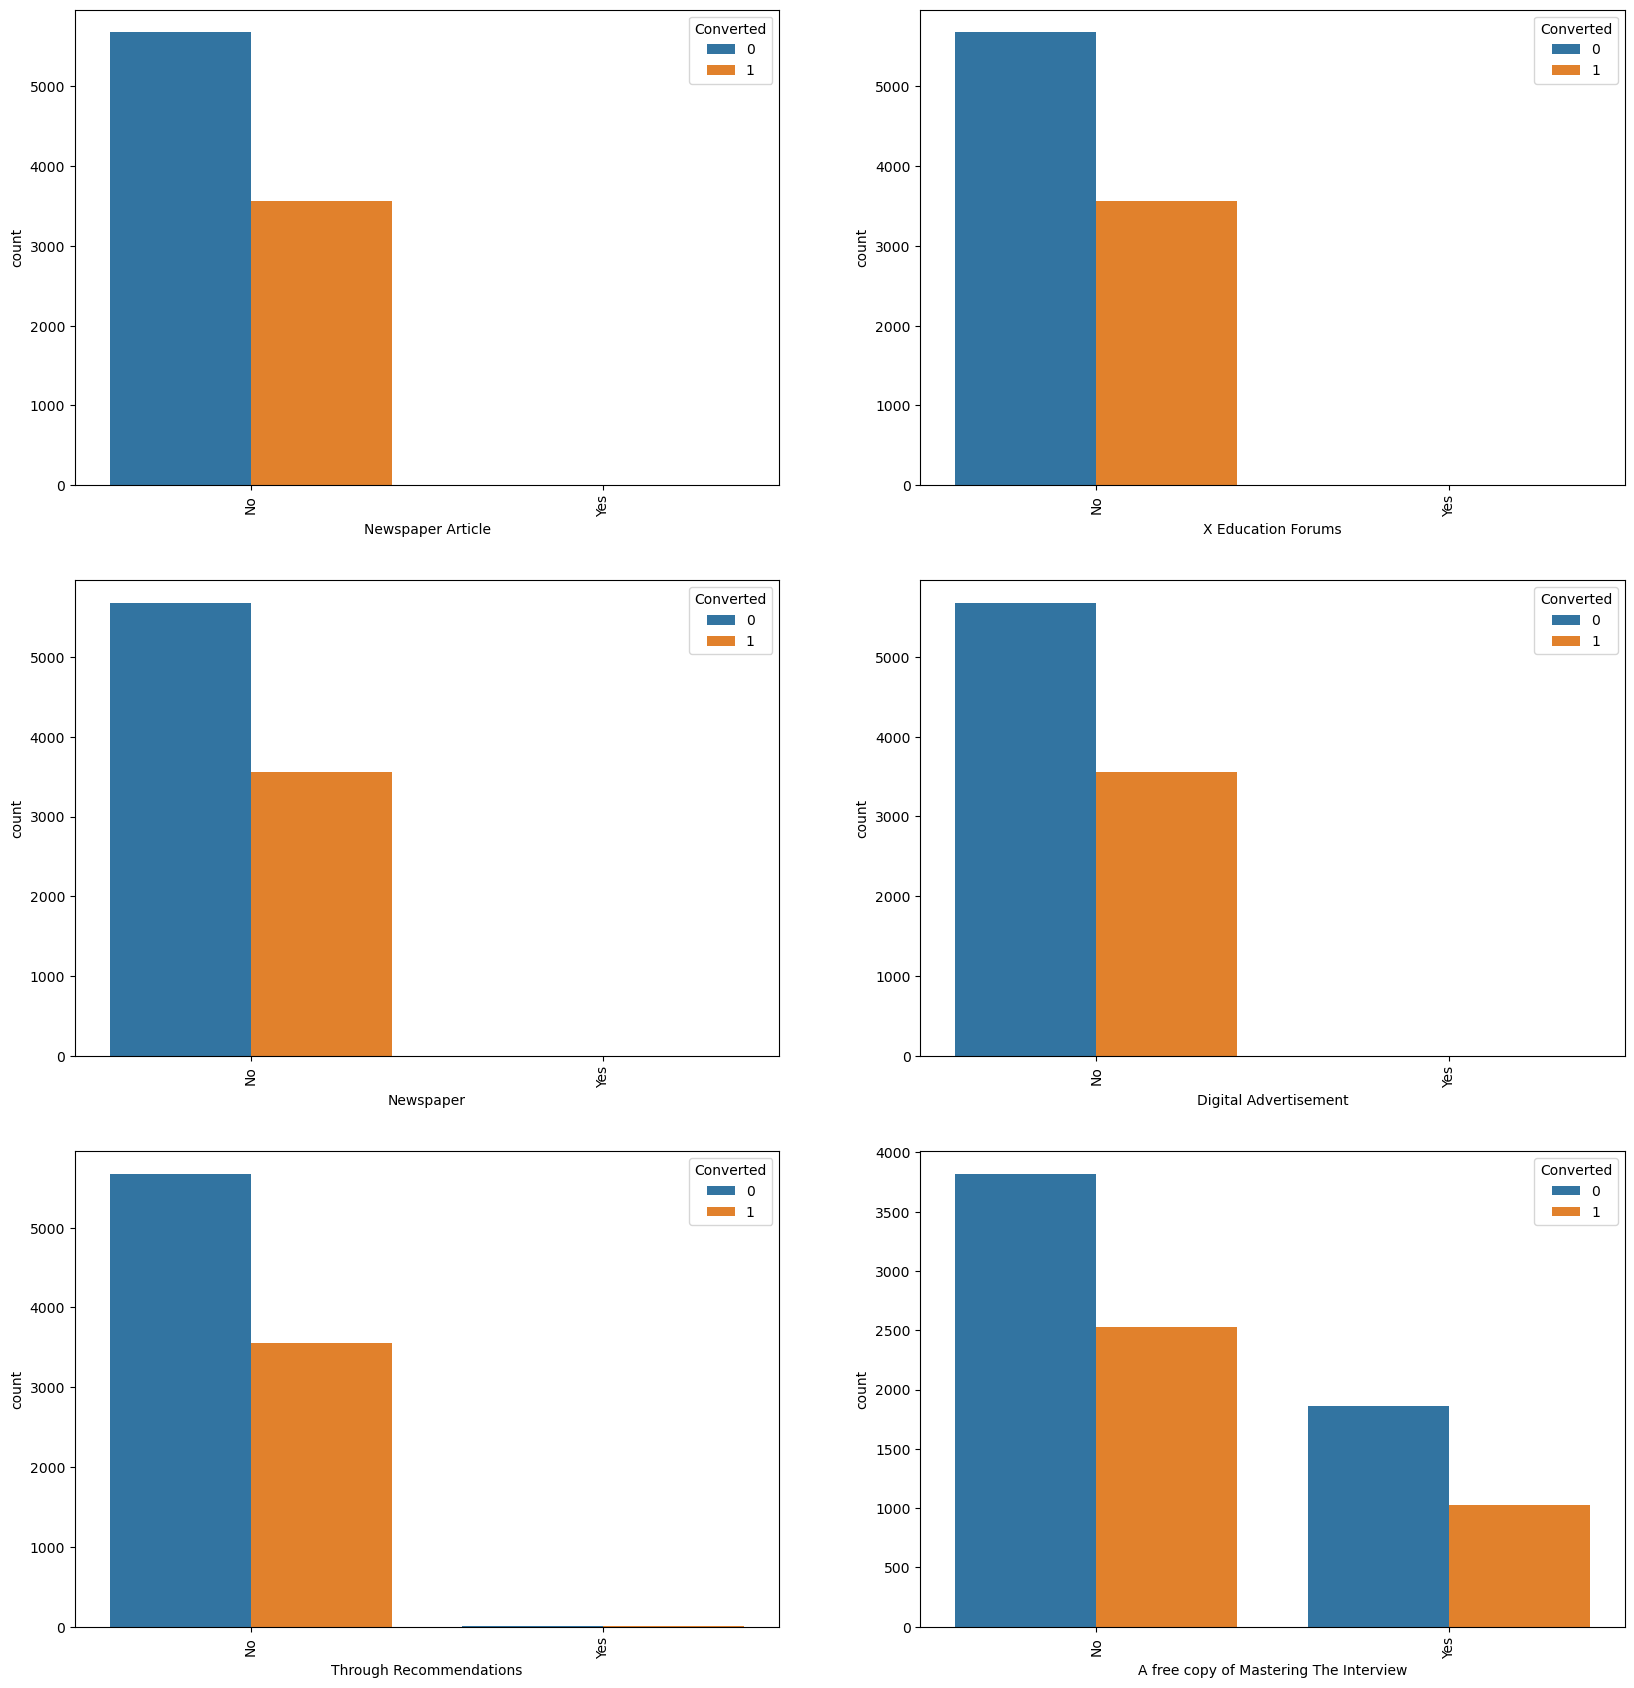

In [75]:

plot_cat_vars(cat_var[9:15])

As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

In [77]:
categories = lead_df['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

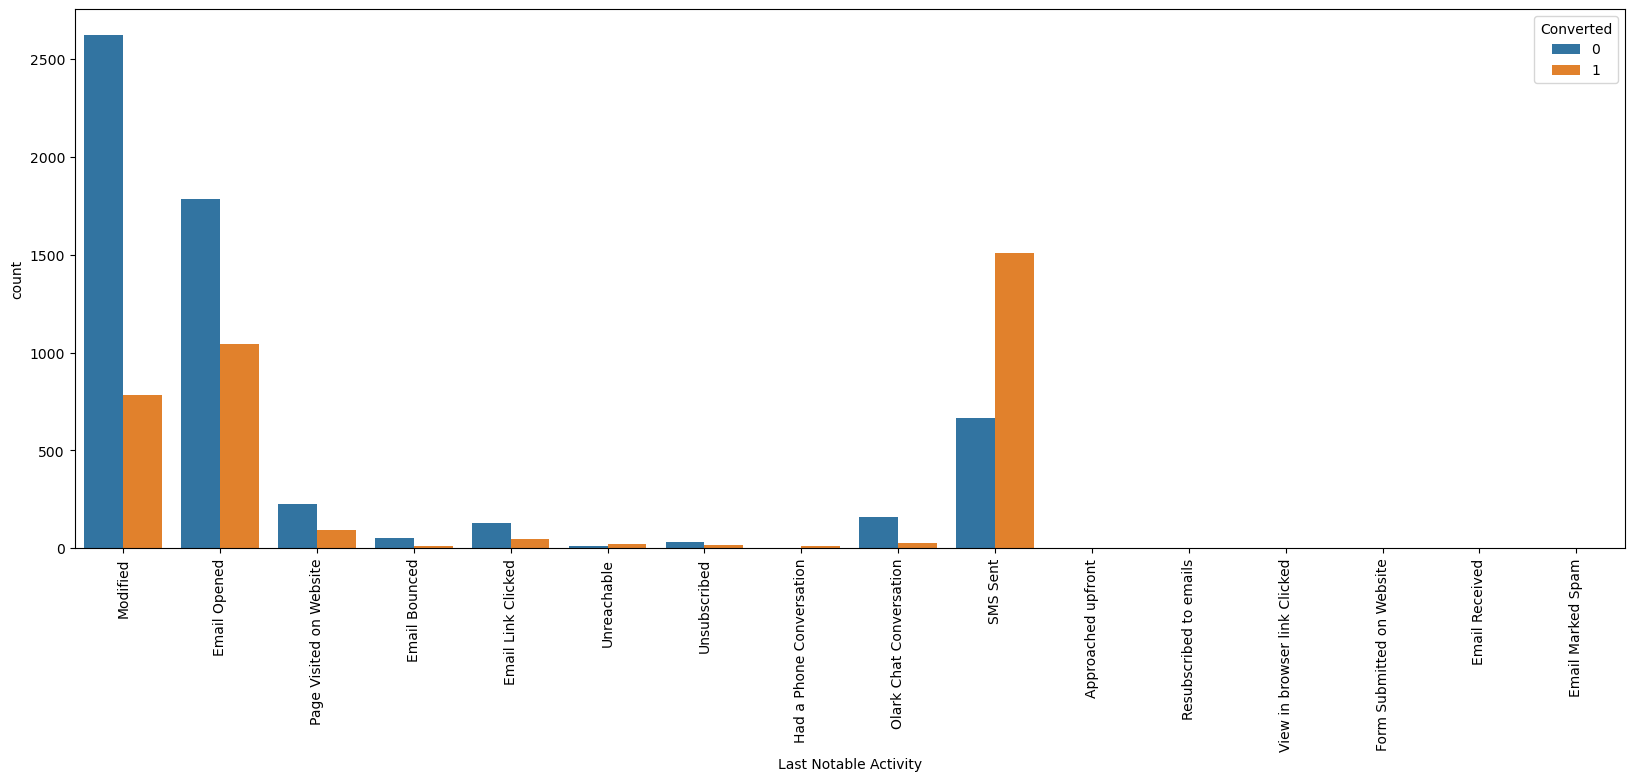

In [78]:

# To plot new categories
#cat_var
plot_cat_var(cat_var[15])

In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. - It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [81]:
lead_df = lead_df.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [82]:
#Lets inspect the final DataFrame after dropping columns
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [83]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [84]:
lead_df.shape

(9240, 11)

In [85]:
lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.134740,487.698268,2.225451
std,0.486714,2.787787,548.021466,1.800023
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,10.000000,2272.000000,6.000000


## Step 3 -  Data Preparation & Dummy variables  

In [87]:
# To convert binary variable (Yes/No) to 0/1
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})

In [88]:
cat_var = list(lead_df.columns[lead_df.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [89]:
# Lets create dummy variables and drop first ones

dummy = pd.get_dummies(lead_df[cat_var],dtype=int, drop_first=True)

# To add result to the original dataframe
lead_df = pd.concat([lead_df, dummy], axis=1)

# To drop the original variables
lead_df = lead_df.drop(cat_var,axis=1)

In [90]:
#Inspecting the dataframe after dummy variable creation
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


We will drop the columns ending with 'Unknown' as they are not significant for analysis

In [92]:

unknown_cols=[col for col in lead_df.columns if col.endswith('_Unknown')]
unknown_cols

['What is your current occupation_Unknown']

In [93]:
lead_df=lead_df.drop(unknown_cols,axis=1)

In [94]:
lead_df.shape

(9240, 50)

## Step 4 - Train-Test Split

In [96]:
# Import the required library
from sklearn.model_selection import train_test_split

In [97]:
# To put feature variable to X
X = lead_df.drop(['Converted'],axis=1)
y = lead_df['Converted']

In [98]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5 -  Feature Scaling

In [100]:
# Importing required package
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.4,0.214349,0.221667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.5,0.046655,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.5,0.541373,0.833333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 6 -  Model Building

In [104]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [105]:

from sklearn.feature_selection import RFE
 # running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)         
rfe = rfe.fit(X_train, y_train)

In [106]:
# Features that have been selected by RFE
col = X_train.columns[rfe.support_]
col 

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [107]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [108]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',axis=1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [109]:
def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [110]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [111]:
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

Running the first model by using the features selected by RFE

In [113]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.9
Date:                Tue, 21 Jan 2025   Deviance:                       5293.8
Time:                        08:55:51   Pearson chi2:                 6.96e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4000
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

What is your current occupation_Housewife is having high p value so we will drop it

In [115]:

col1 = col.drop('What is your current occupation_Housewife',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.3
Date:                Tue, 21 Jan 2025   Deviance:                       5318.6
Time:                        08:55:51   Pearson chi2:                 7.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We see that the p value of 'Last Activity_Had a Phone Conversation' is 0.532 which is high so we will drop it and rebuild the model

In [117]:

col2 = col1.drop('Last Activity_Had a Phone Conversation',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.5
Date:                Tue, 21 Jan 2025   Deviance:                       5319.0
Time:                        08:55:51   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All the p values are now within range .Now let us check the VIF score for the features

In [119]:

check_VIF(X3)

,Features,VIF
9,What is your current occupation_Unemployed,2.51
1,TotalVisits,2.40
2,Total Time Spent on Website,2.06
3,Lead Origin_Lead Add Form,1.56
4,Lead Source_Olark Chat,1.54
7,Last Activity_Others,1.51
6,Last Activity_Olark Chat Conversation,1.39
10,What is your current occupation_Working Profes...,1.36
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.06


<Axes: >

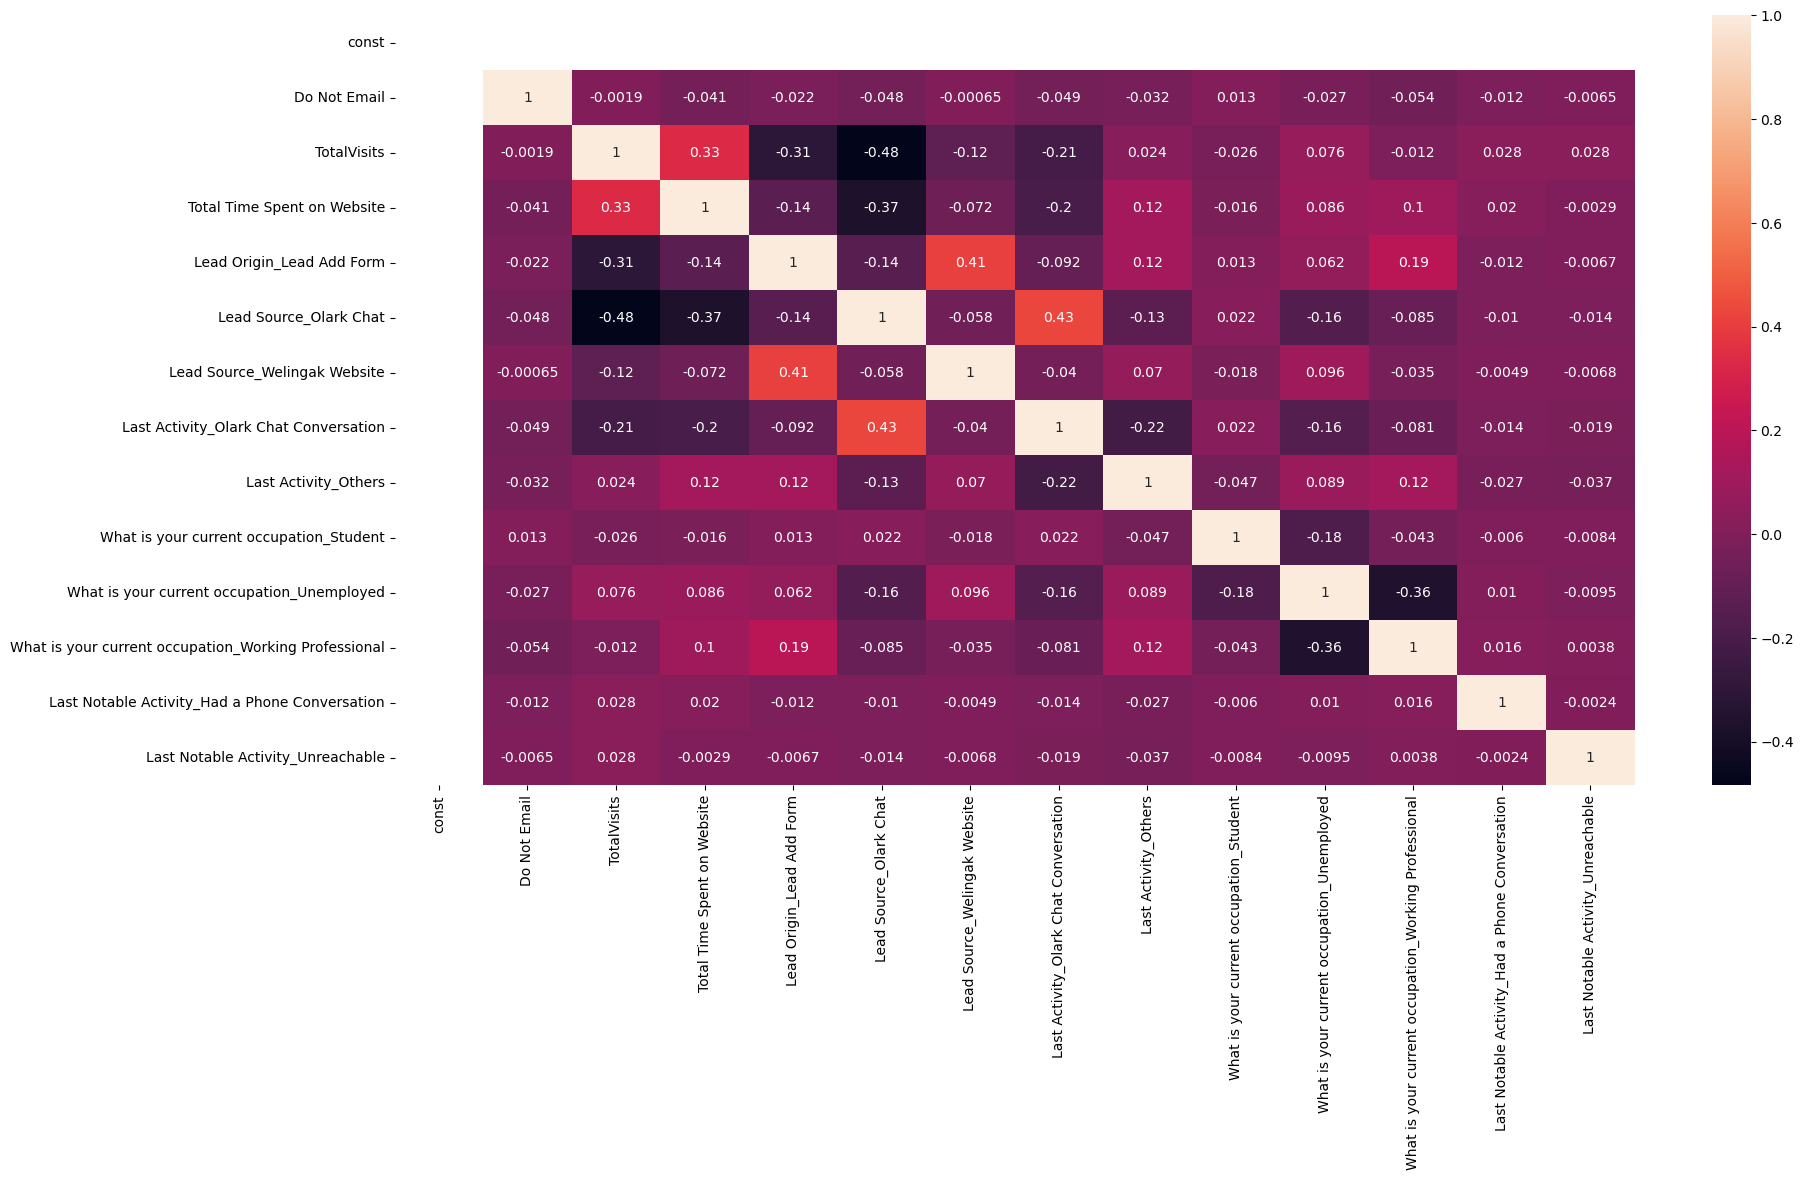

In [120]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X3.corr(),annot = True)

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

All the VIF scores are within range which indicates there is no multicolinearity among the features.

Let us predict the values on train dataset and check the accuracy,specificity and sensitivity values

In [124]:

# To get predicted values on train set
y_train_pred_final = get_pred(X3,logm3)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.292373,1871,0
1,0,0.224237,6795,0
2,0,0.436032,3516,0
3,0,0.832838,8105,1
4,0,0.292373,3934,0


In [125]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3540  462]
 [ 749 1717]]
Training Accuracy:  0.8127705627705628


In [126]:
other_metrics(confusion)

Sensitivity:  0.6962692619626926
Specificity:  0.8845577211394303
False postive rate:  0.11544227886056972
Positive predictive value:  0.7879761358421294
Negative predictive value:  0.8253672184658428


## Step 7 -  Model Evaluation

### 7.1. Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:

# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [130]:

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

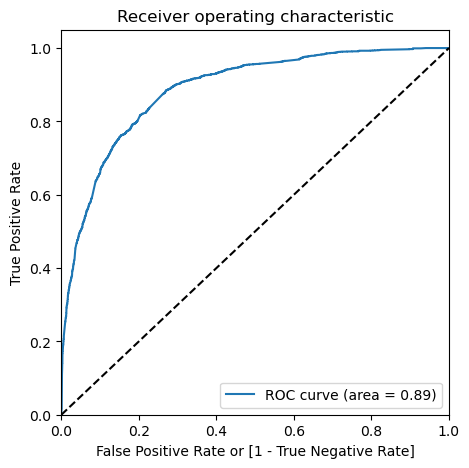

In [131]:

# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [132]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.8866734515953701


Area under curve (auc) is approximately 0.89 which is very close to ideal auc of 1.

In [134]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.292373,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.224237,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.436032,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.832838,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.292373,3934,0,1,1,1,0,0,0,0,0,0,0


In [135]:

# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588126  0.978913  0.347326
0.2   0.2  0.760513  0.914031  0.665917
0.3   0.3  0.797464  0.834955  0.774363
0.4   0.4  0.811998  0.763179  0.842079
0.5   0.5  0.812771  0.696269  0.884558
0.6   0.6  0.805659  0.631792  0.912794
0.7   0.7  0.782158  0.517032  0.945527
0.8   0.8  0.751855  0.397810  0.970015
0.9   0.9  0.717996  0.281022  0.987256


### 7.2. Finding the optimal cutoff point
Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

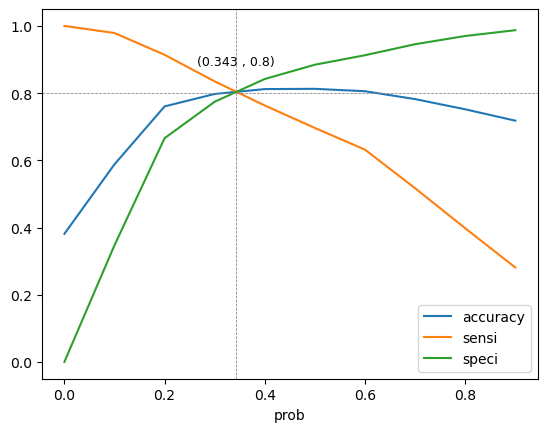

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [138]:
# Using 0.34 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.292373,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.224237,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.436032,3516,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.832838,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.292373,3934,0,1,1,1,0,0,0,0,0,0,0,0


### 7.3 Adding Lead Score to Train Data set

A high value of lead score indicates its a hot lead, whereas lower value indicates its a cold lead

In [299]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr,lead_score
0,0,0.292373,1871,0,1,1,1,0,0,0,0,0,0,0,29,0,29
1,0,0.224237,6795,0,1,1,1,0,0,0,0,0,0,0,22,0,22
2,0,0.436032,3516,0,1,1,1,1,1,0,0,0,0,0,44,1,44
3,0,0.832838,8105,1,1,1,1,1,1,1,1,1,1,0,83,1,83
4,0,0.292373,3934,0,1,1,1,0,0,0,0,0,0,0,29,0,29


In [142]:

# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
     

Confusion Matrix:
[[  2  91  74 ...   2   5   1]
 [  0   0   0 ...  97 183  36]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Training Accuracy:  0.00030921459492888067


In [143]:

# Other metrics
other_metrics(confusion2)
     

Sensitivity:  nan
Specificity:  0.021505376344086023
False postive rate:  0.978494623655914
Positive predictive value:  0.0
Negative predictive value:  1.0


Acccuracy is 80% , Sensitivity is 79% and Specificity is 80% with 0.34 as cutoff

### 7.4 Classification report

In [146]:

from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4002
           1       0.00      0.00      0.00      2466
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

### 7.5 Precision and Recall

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7879761358421294

In [150]:

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
     

0.6962692619626926

We can see the Precision=0.78 and Recall=0.69 

### 7.6 Precision and Recall Tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

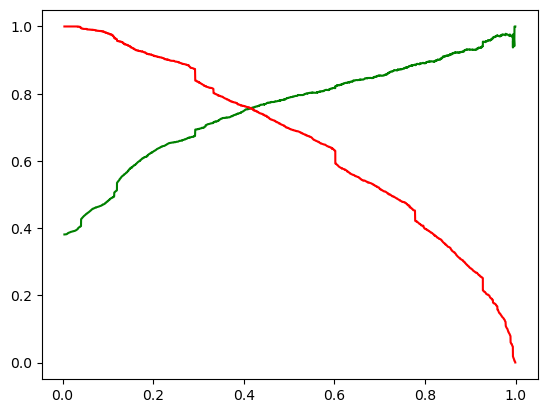

In [155]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
     

From the curve above, 0.4 is the optimum point to take as a cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [157]:
# Using 0.4 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.292373,1871,0,1,1,1,0,0,0,0,0,0,0,29,0
1,0,0.224237,6795,0,1,1,1,0,0,0,0,0,0,0,22,0
2,0,0.436032,3516,0,1,1,1,1,1,0,0,0,0,0,44,1
3,0,0.832838,8105,1,1,1,1,1,1,1,1,1,1,0,83,1
4,0,0.292373,3934,0,1,1,1,0,0,0,0,0,0,0,29,0


In [158]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3370  632]
 [ 584 1882]]
Training Accuracy:  0.8119975262832406


In [159]:
other_metrics(confusion3)

Sensitivity:  0.7631792376317924
Specificity:  0.8420789605197402
False postive rate:  0.15792103948025987
Positive predictive value:  0.7486077963404932
Negative predictive value:  0.8523014668689934


Acccuracy is 81% , Sensitivity is 76% and Specificity is 84% with 0.4% as cutoff

Accuracy and other metrics yield better values for cutoff 0.34. We'll use the cutoff of 0.34 as derived earlier for predictions on the test set.

## Step 8 -  Prediction on Test set

In [163]:
#Feature scaling on test data set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()
     

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0.8,0.448735,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0.5,0.026187,0.833333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [164]:
# To get final features
X_test_sm = X_test[col2]

In [165]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

# Making predictions
y_test_pred = logm3.predict(X_test_sm)
     

In [166]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()
     

,0
4269,0.582367
2376,0.927611
7766,0.926117
9199,0.113907
4359,0.777847


In [167]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [168]:

# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()
     

,Converted,Lead ID,Converted_prob
0,1,4269,0.582367
1,1,2376,0.927611
2,1,7766,0.926117
3,0,9199,0.113907
4,1,4359,0.777847


In [169]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,1,4269,0.582367,1
1,1,2376,0.927611,1
2,1,7766,0.926117,1
3,0,9199,0.113907,0
4,1,4359,0.777847,1


## Lead Score on test data

In [171]:
y_pred_final['lead_score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted,lead_score
0,1,4269,0.582367,1,58
1,1,2376,0.927611,1,93
2,1,7766,0.926117,1,93
3,0,9199,0.113907,0,11
4,1,4359,0.777847,1,78


In [172]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.89319479501066


In [173]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1378  299]
 [ 225  870]]
Training Accuracy:  0.810966810966811


In [174]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.7945205479452054
Specificity:  0.8217054263565892
False postive rate:  0.17829457364341086
Positive predictive value:  0.7442258340461934
Negative predictive value:  0.859638178415471


Acccuracy is 81% , Sensitivity is 79% and Specificity is 82% on test data

## Conclusion

- Key Predictors of Conversion
  - Total Time Spent on Website (4.4833): Strongest positive predictor of lead conversion. Customers spending more time on the website are highly likely to convert.
  - Lead Origin: Lead Add Form (3.7892): Leads originating from the "Lead Add Form" show high conversion potential.
  - Occupation: Working Professional (3.6360): Working professionals are highly likely to convert compared to other occupations.
  - Last Notable Activity: Phone Conversation (3.5757): Leads who had a phone conversation with the team show significantly higher chances of conversion.


- Negative Influencers of Conversion
  - Do Not Email (-1.3659): Leads opting out of emails have a significantly lower likelihood of conversion.
  - Last Activity: Olark Chat Conversation (-1.1676): Leads engaging via Olark Chat show a lower probability of conversion.


- Secondary Predictors
  - Total Visits (0.8349): Higher website visits are moderately associated with lead conversion.
  - Lead Source: Olark Chat (1.6522): Leads from Olark Chat perform well, though less impactful than other factors.
  - Unreachable Leads (2.0023): Leads who were unreachable show a higher conversion rate once re-engaged.


- Model Accuracy
  - The model's coefficients align with the business objective of identifying high-potential leads.
  - Insights derived from the model can help achieve the target lead conversion rate of 80%.
